In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
import cv2
import imghdr
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load Dataset

In [ ]:
base_dir = "/content/drive/Shared drives/Los Errescuer/Lightweight CNN/"
data_dir = os.path.join(base_dir, "wildfire_dataset")
classes = os.listdir(data_dir)
print(classes)

['forest', 'fire', 'smoke']


In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, class_names=classes, 
                                                   batch_size=16, image_size=(128,128),
                                                   shuffle=True, seed=0)
# seed = 42

Found 781 files belonging to 3 classes.


In [ ]:
data = data.map(lambda x,y: (x/255, y))
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [ ]:
train_size = int(len(data)*0.7)
validate_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

train = data.take(train_size)
val = data.skip(train_size).take(validate_size)
test = data.skip(train_size+validate_size).take(test_size)

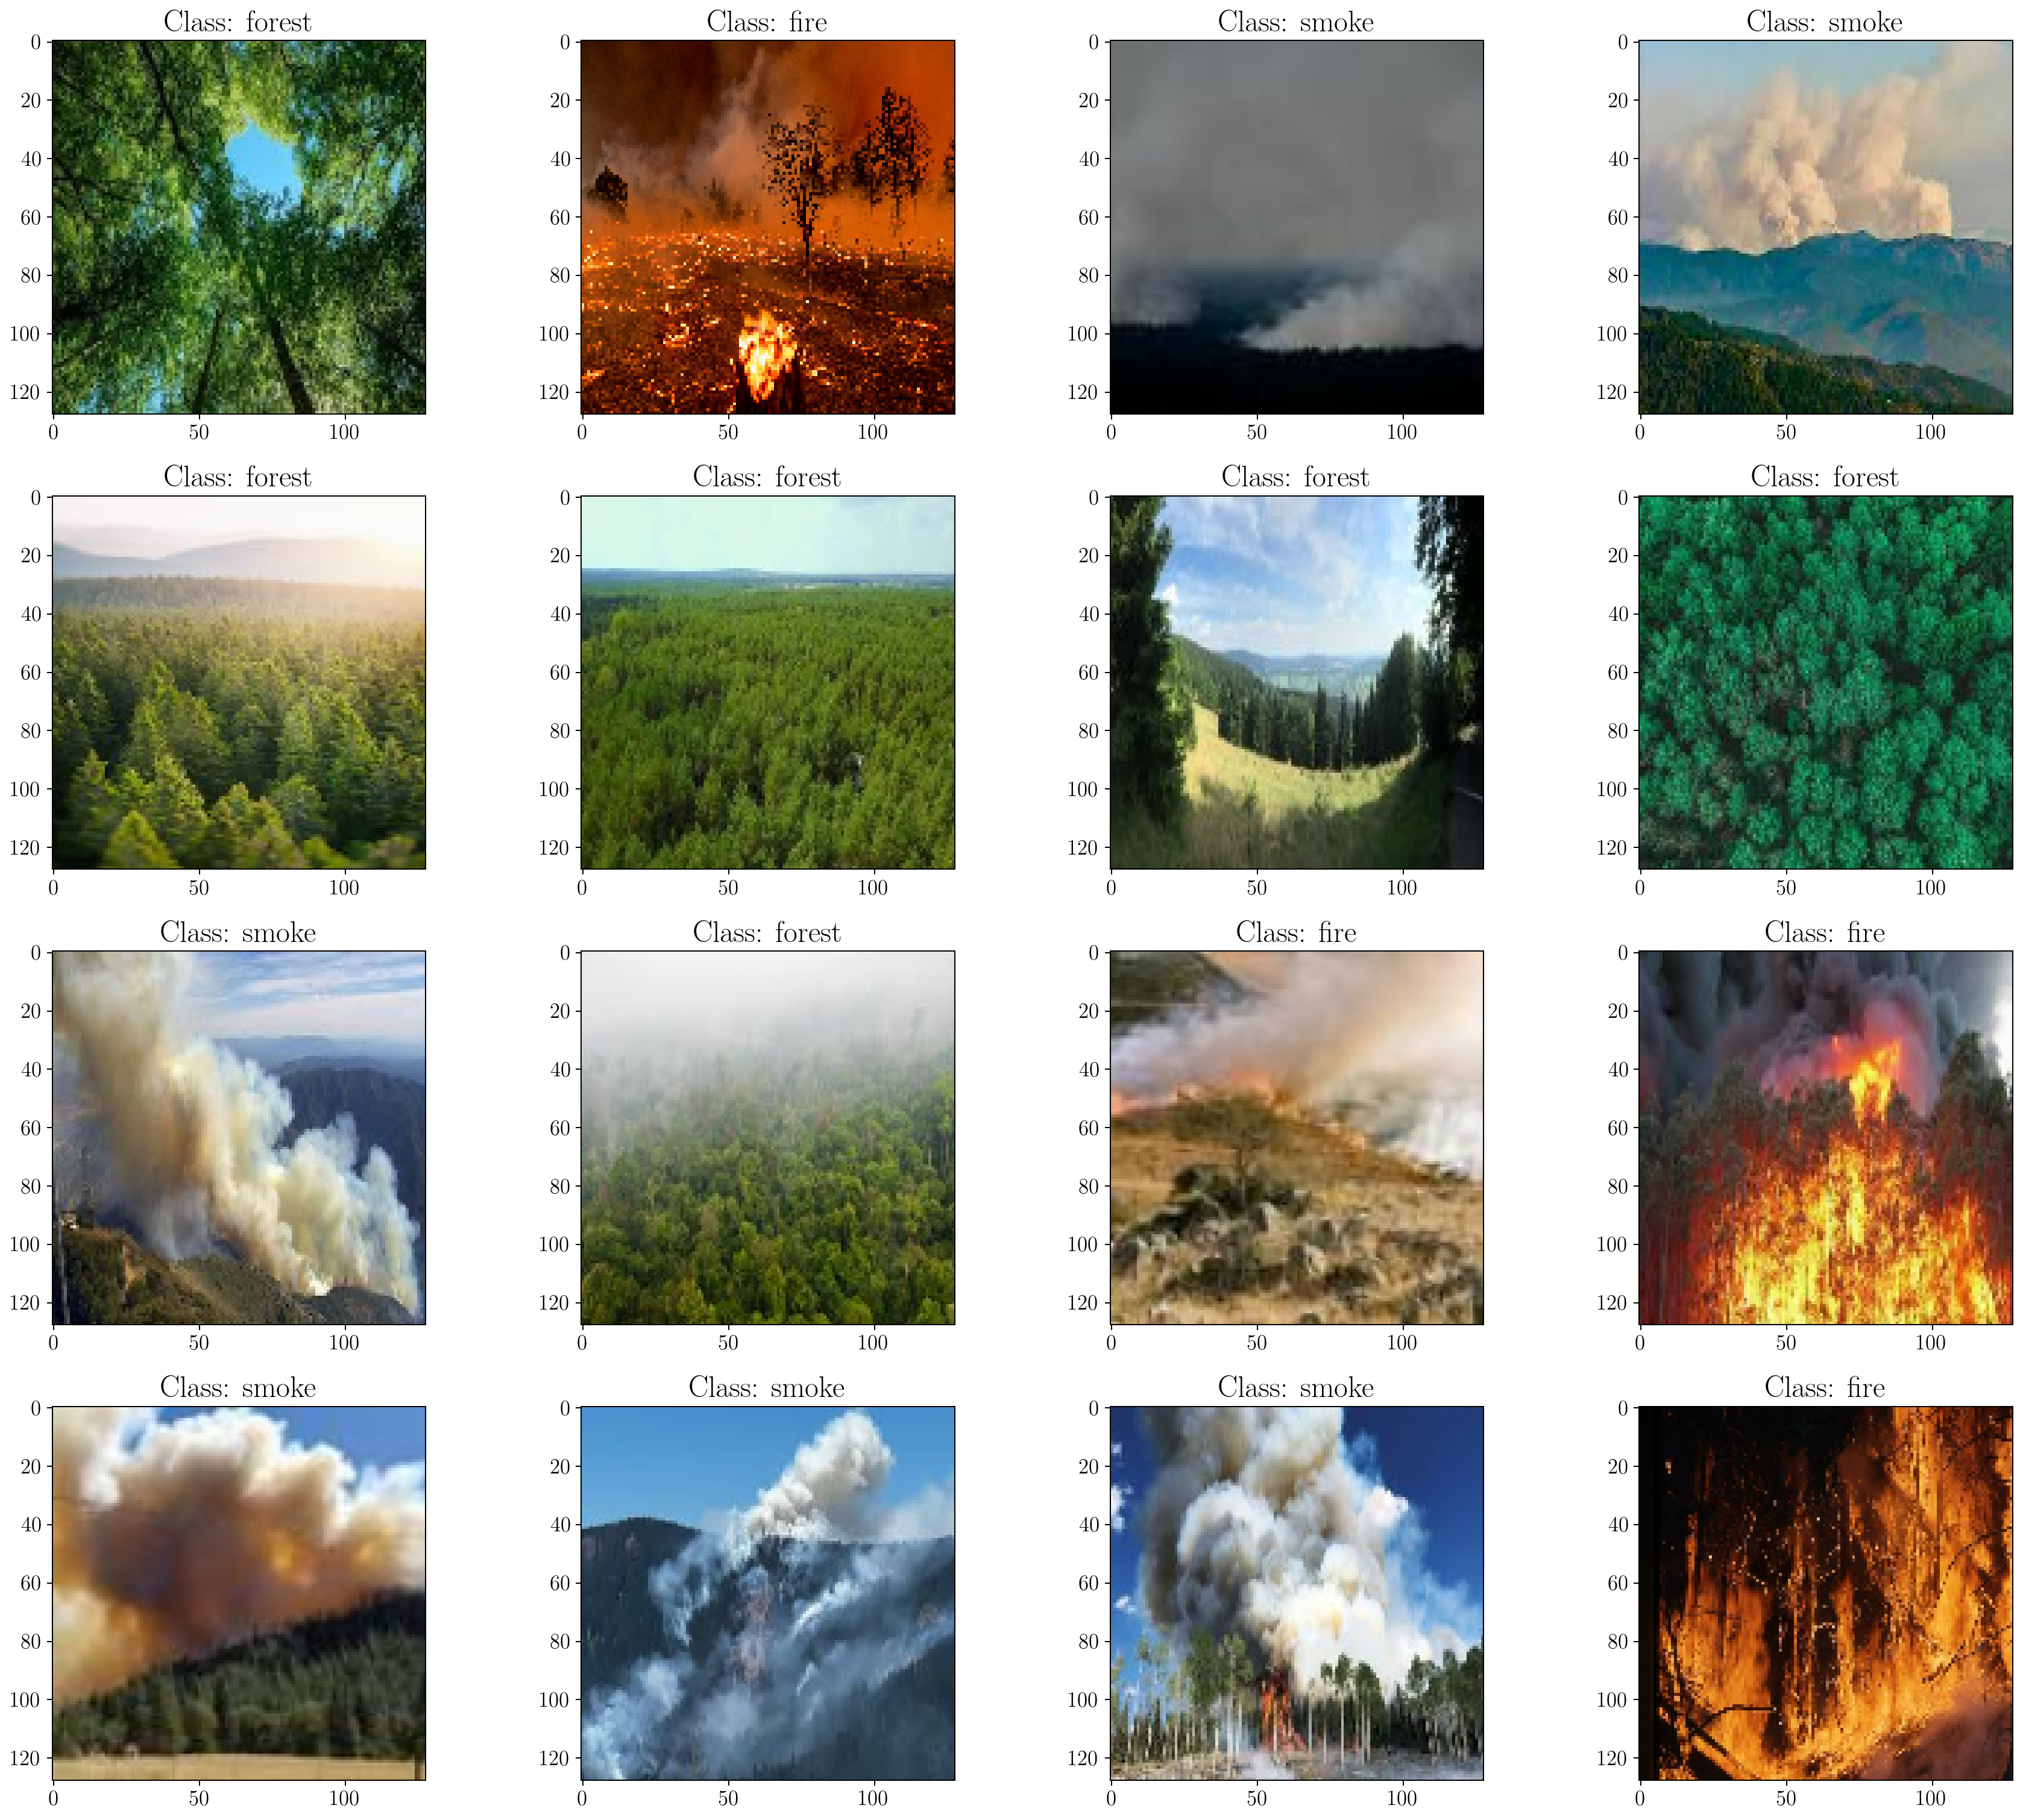

In [ ]:
plt.rcParams['figure.dpi'] = 180
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14
plt.rcParams["text.usetex"] = True
plt.rcParams["axes.titlesize"] = 16

nrows = 4
ncols = 4

fig, axes = plt.subplots(nrows,ncols, figsize=(20,17))

for i, iax in enumerate(list(itertools.product(range(nrows), range(ncols)))):
  img = batch[0][i]
  axes[iax[0], iax[1]].imshow(img)
  axes[iax[0], iax[1]].set_title(f"Class: {classes[batch[1][i]]}", fontsize=20)
plt.tight_layout()

# Load Model

In [ ]:
models_dir = os.path.join(base_dir, "models")
model99 = load_model(os.path.join(models_dir, "model99.h5"))

# Classification Metrics

In [ ]:
y_true = []
y_pred = []

for batch in test.as_numpy_iterator():
  X,y = batch
  prediction = model99.predict(X).argmax(axis=1).astype(int)
  y_true.extend(y)
  y_pred.extend(prediction)

1/1 [==============================] - 0s 90ms/step


In [ ]:
# !apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

In [ ]:
print(classification_report(y_true, y_pred, target_names=classes))

              precision    recall  f1-score   support

      forest       0.93      1.00      0.96        27
        fire       1.00      1.00      1.00        22
       smoke       1.00      0.87      0.93        15

    accuracy                           0.97        64
   macro avg       0.98      0.96      0.96        64
weighted avg       0.97      0.97      0.97        64



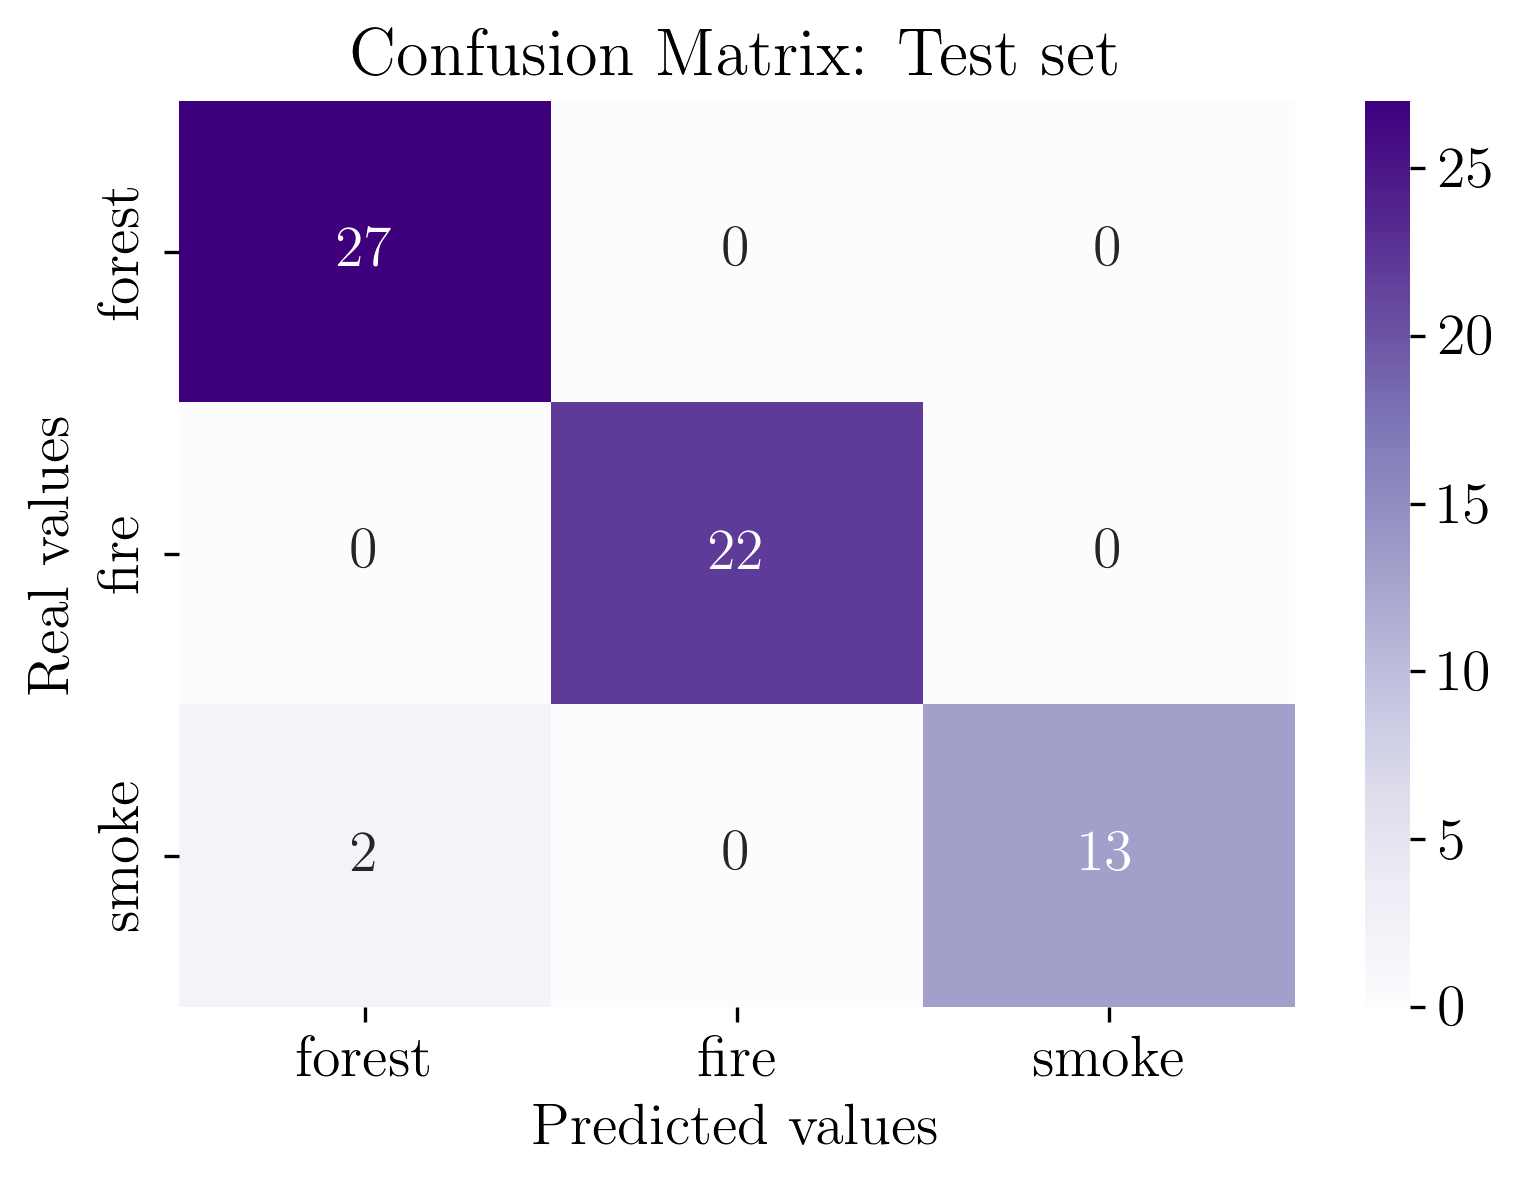

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14
plt.rcParams["text.usetex"] = True
plt.rcParams["axes.titlesize"] = 16

fig, ax = plt.subplots(1,1)
sns.heatmap(confusion_matrix(y_true, y_pred, normalize=None), annot = True, cmap = "Purples", ax = ax)
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
ax.set_title("Confusion Matrix: Test set")
ax.set_ylabel("Real values")
ax.set_xlabel("Predicted values")
plt.show()

In [ ]:
print(y_true)
print(y_pred)

[1, 2, 0, 0, 0, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2]
[1, 2, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2]


# Feature Maps

In [ ]:
test_batch = test.as_numpy_iterator().next()

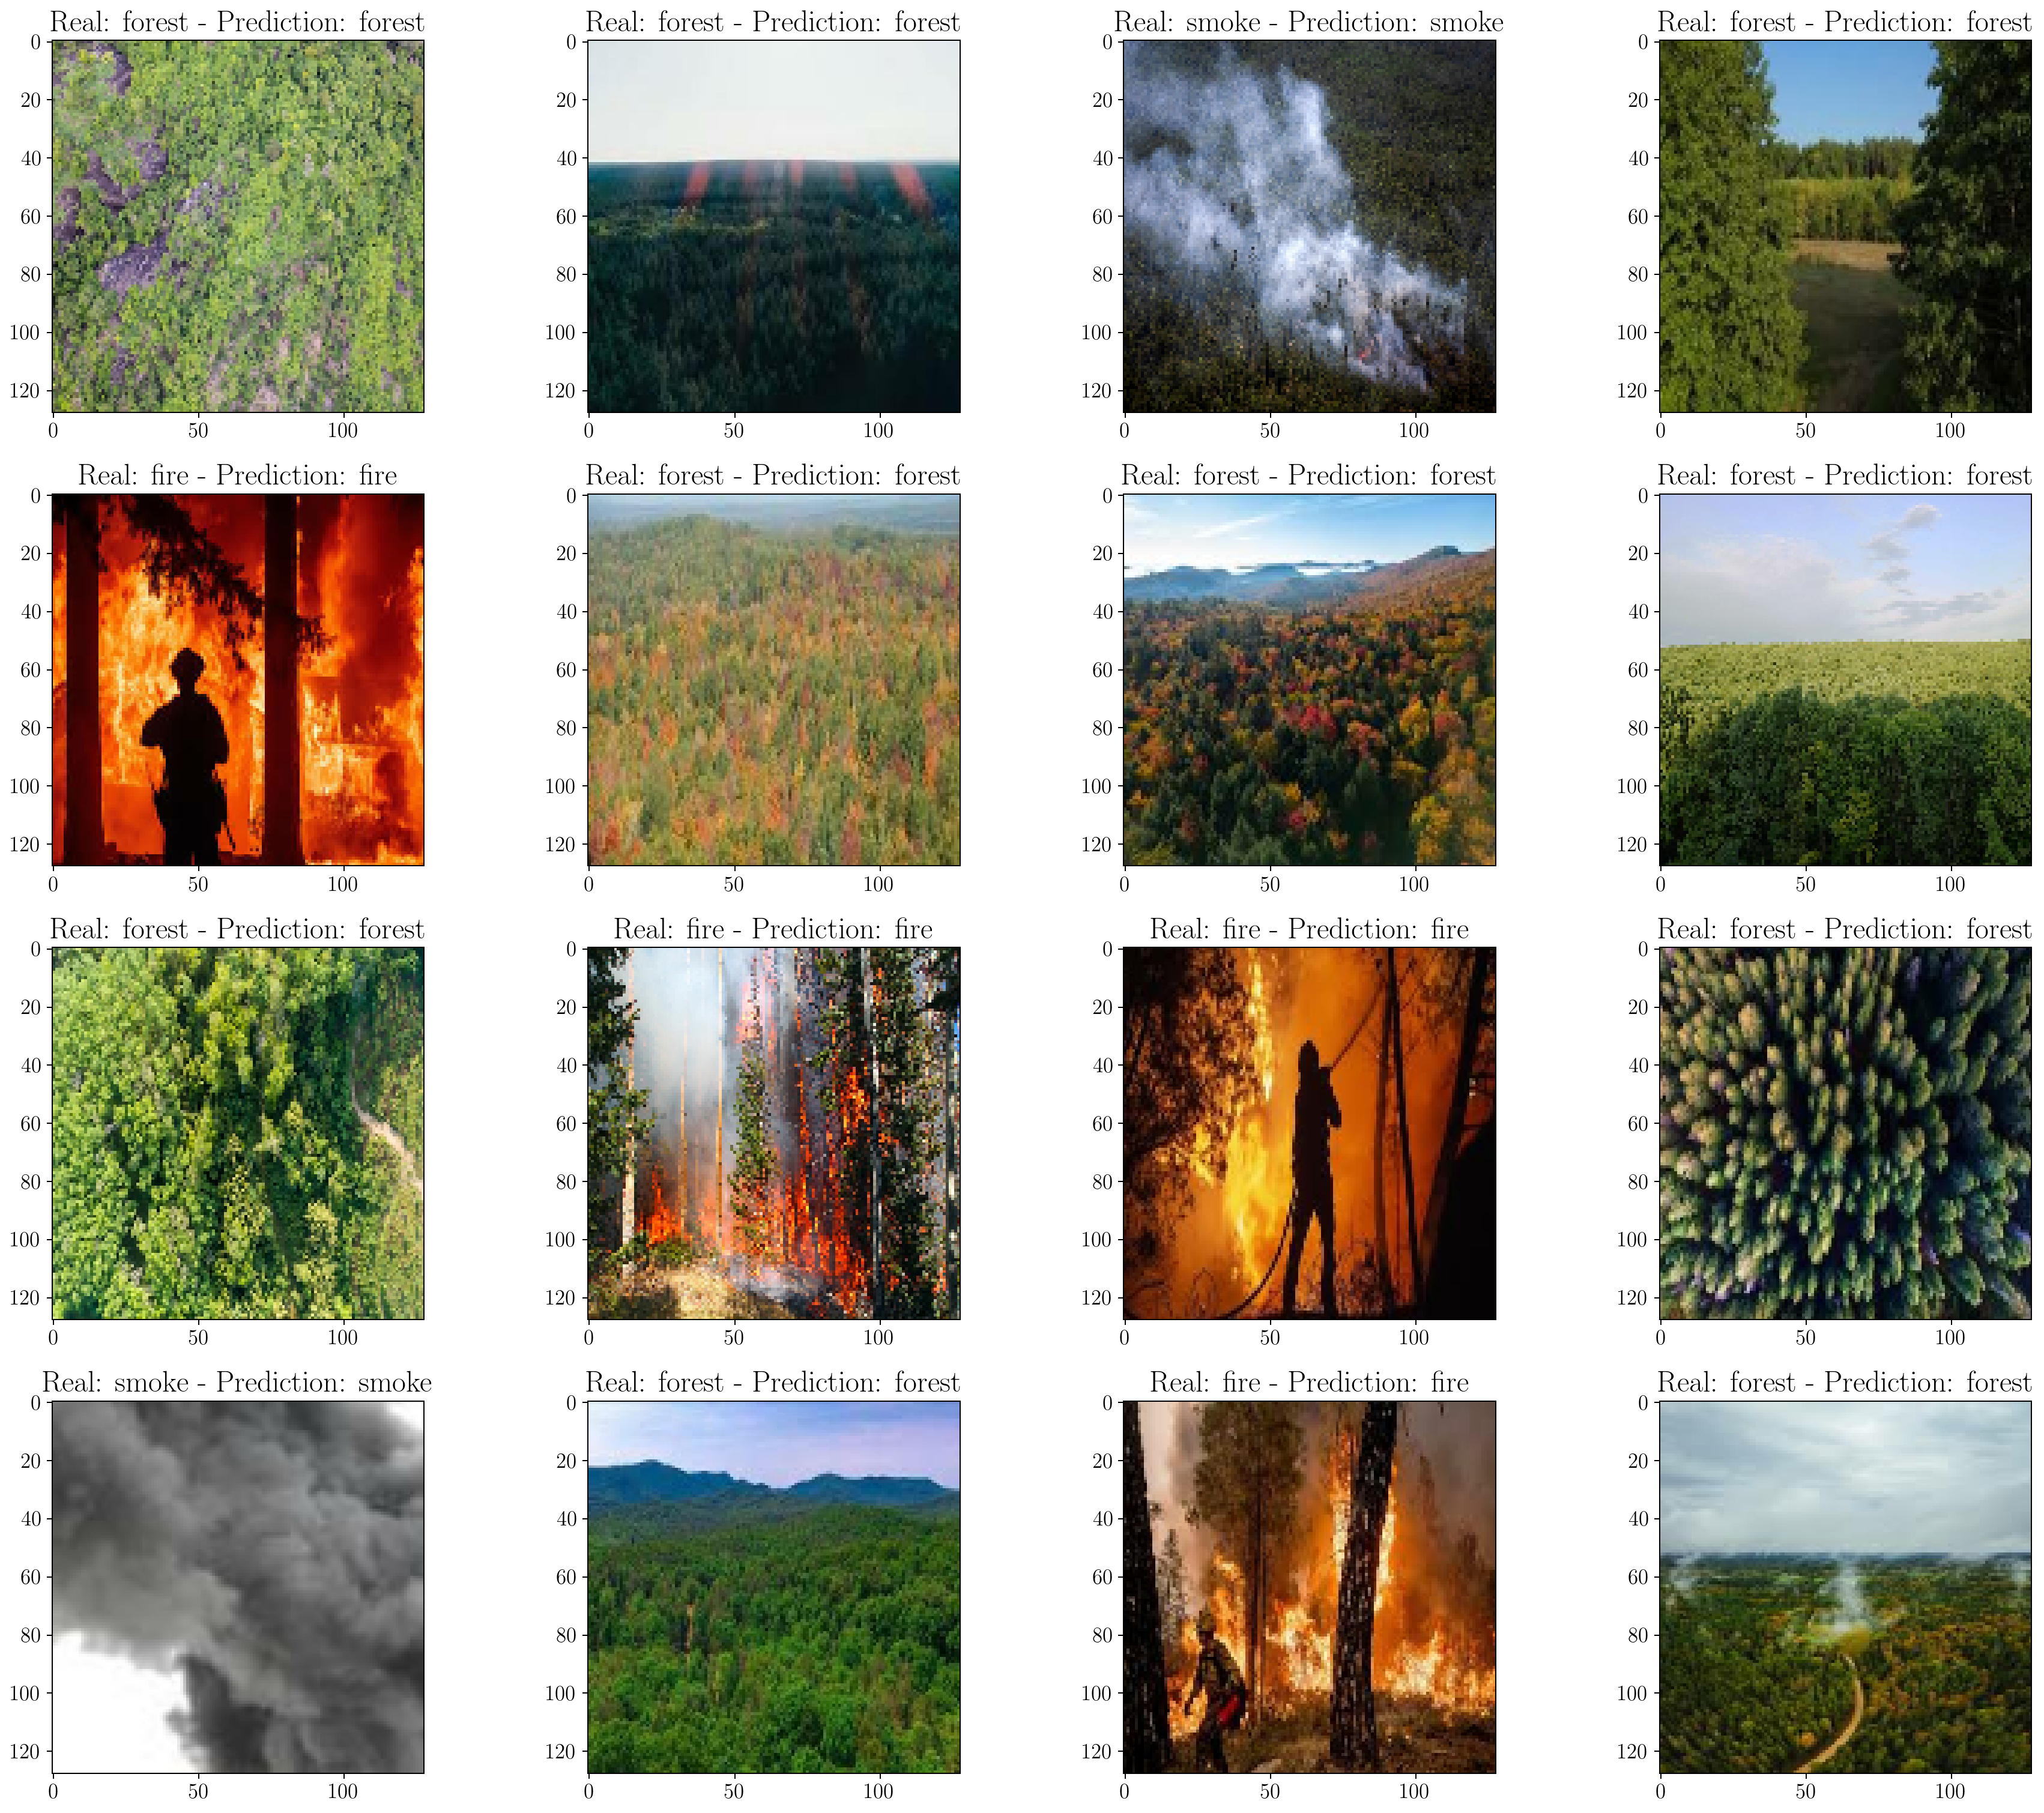

In [ ]:
plt.rcParams['figure.dpi'] = 180
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14
plt.rcParams["text.usetex"] = True
plt.rcParams["axes.titlesize"] = 16

nrows = 4
ncols = 4

fig, axes = plt.subplots(nrows,ncols, figsize=(20,17))

for i, iax in enumerate(list(itertools.product(range(nrows), range(ncols)))):
  img = test_batch[0][i]
  prediction = model99.predict(np.expand_dims(img, axis=0), verbose=0).argmax(axis=1).astype(int)[0]
  axes[iax[0], iax[1]].imshow(img)
  axes[iax[0], iax[1]].set_title(f"Real: {classes[test_batch[1][i]]} - Prediction: {classes[prediction]}", fontsize=20)
plt.tight_layout()

1/1 [==============================] - 0s 42ms/step


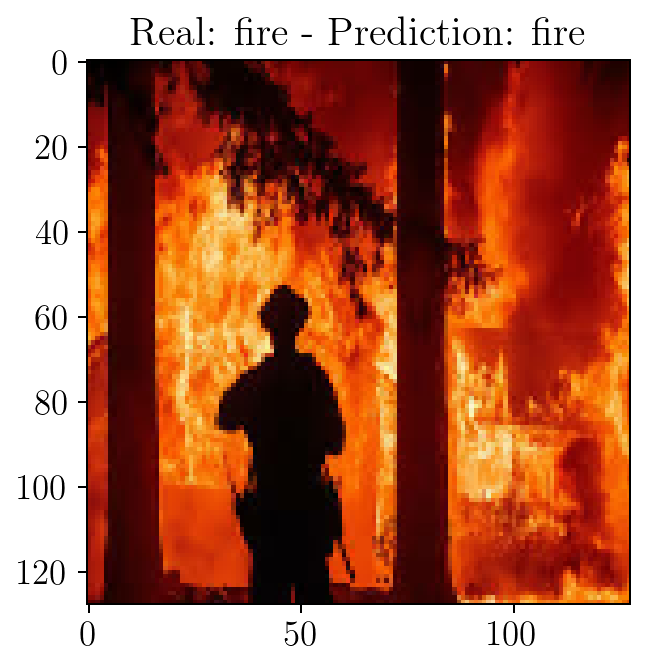

In [ ]:
i = 4
example = test_batch[0][i]
prediction = model99.predict(np.expand_dims(example, axis=0)).argmax(axis=1).astype(int)[0]
plt.imshow(example)
plt.title(f"Real: {classes[test_batch[1][i]]} - Prediction: {classes[prediction]}")
plt.show()

In [ ]:
features = Sequential(model99.layers[:3])
# np.expand_dims(example, axis=0)
image_features = features.predict(np.expand_dims(example, axis=0))
image_features.shape

1/1 [==============================] - 0s 52ms/step


(1, 63, 63, 16)

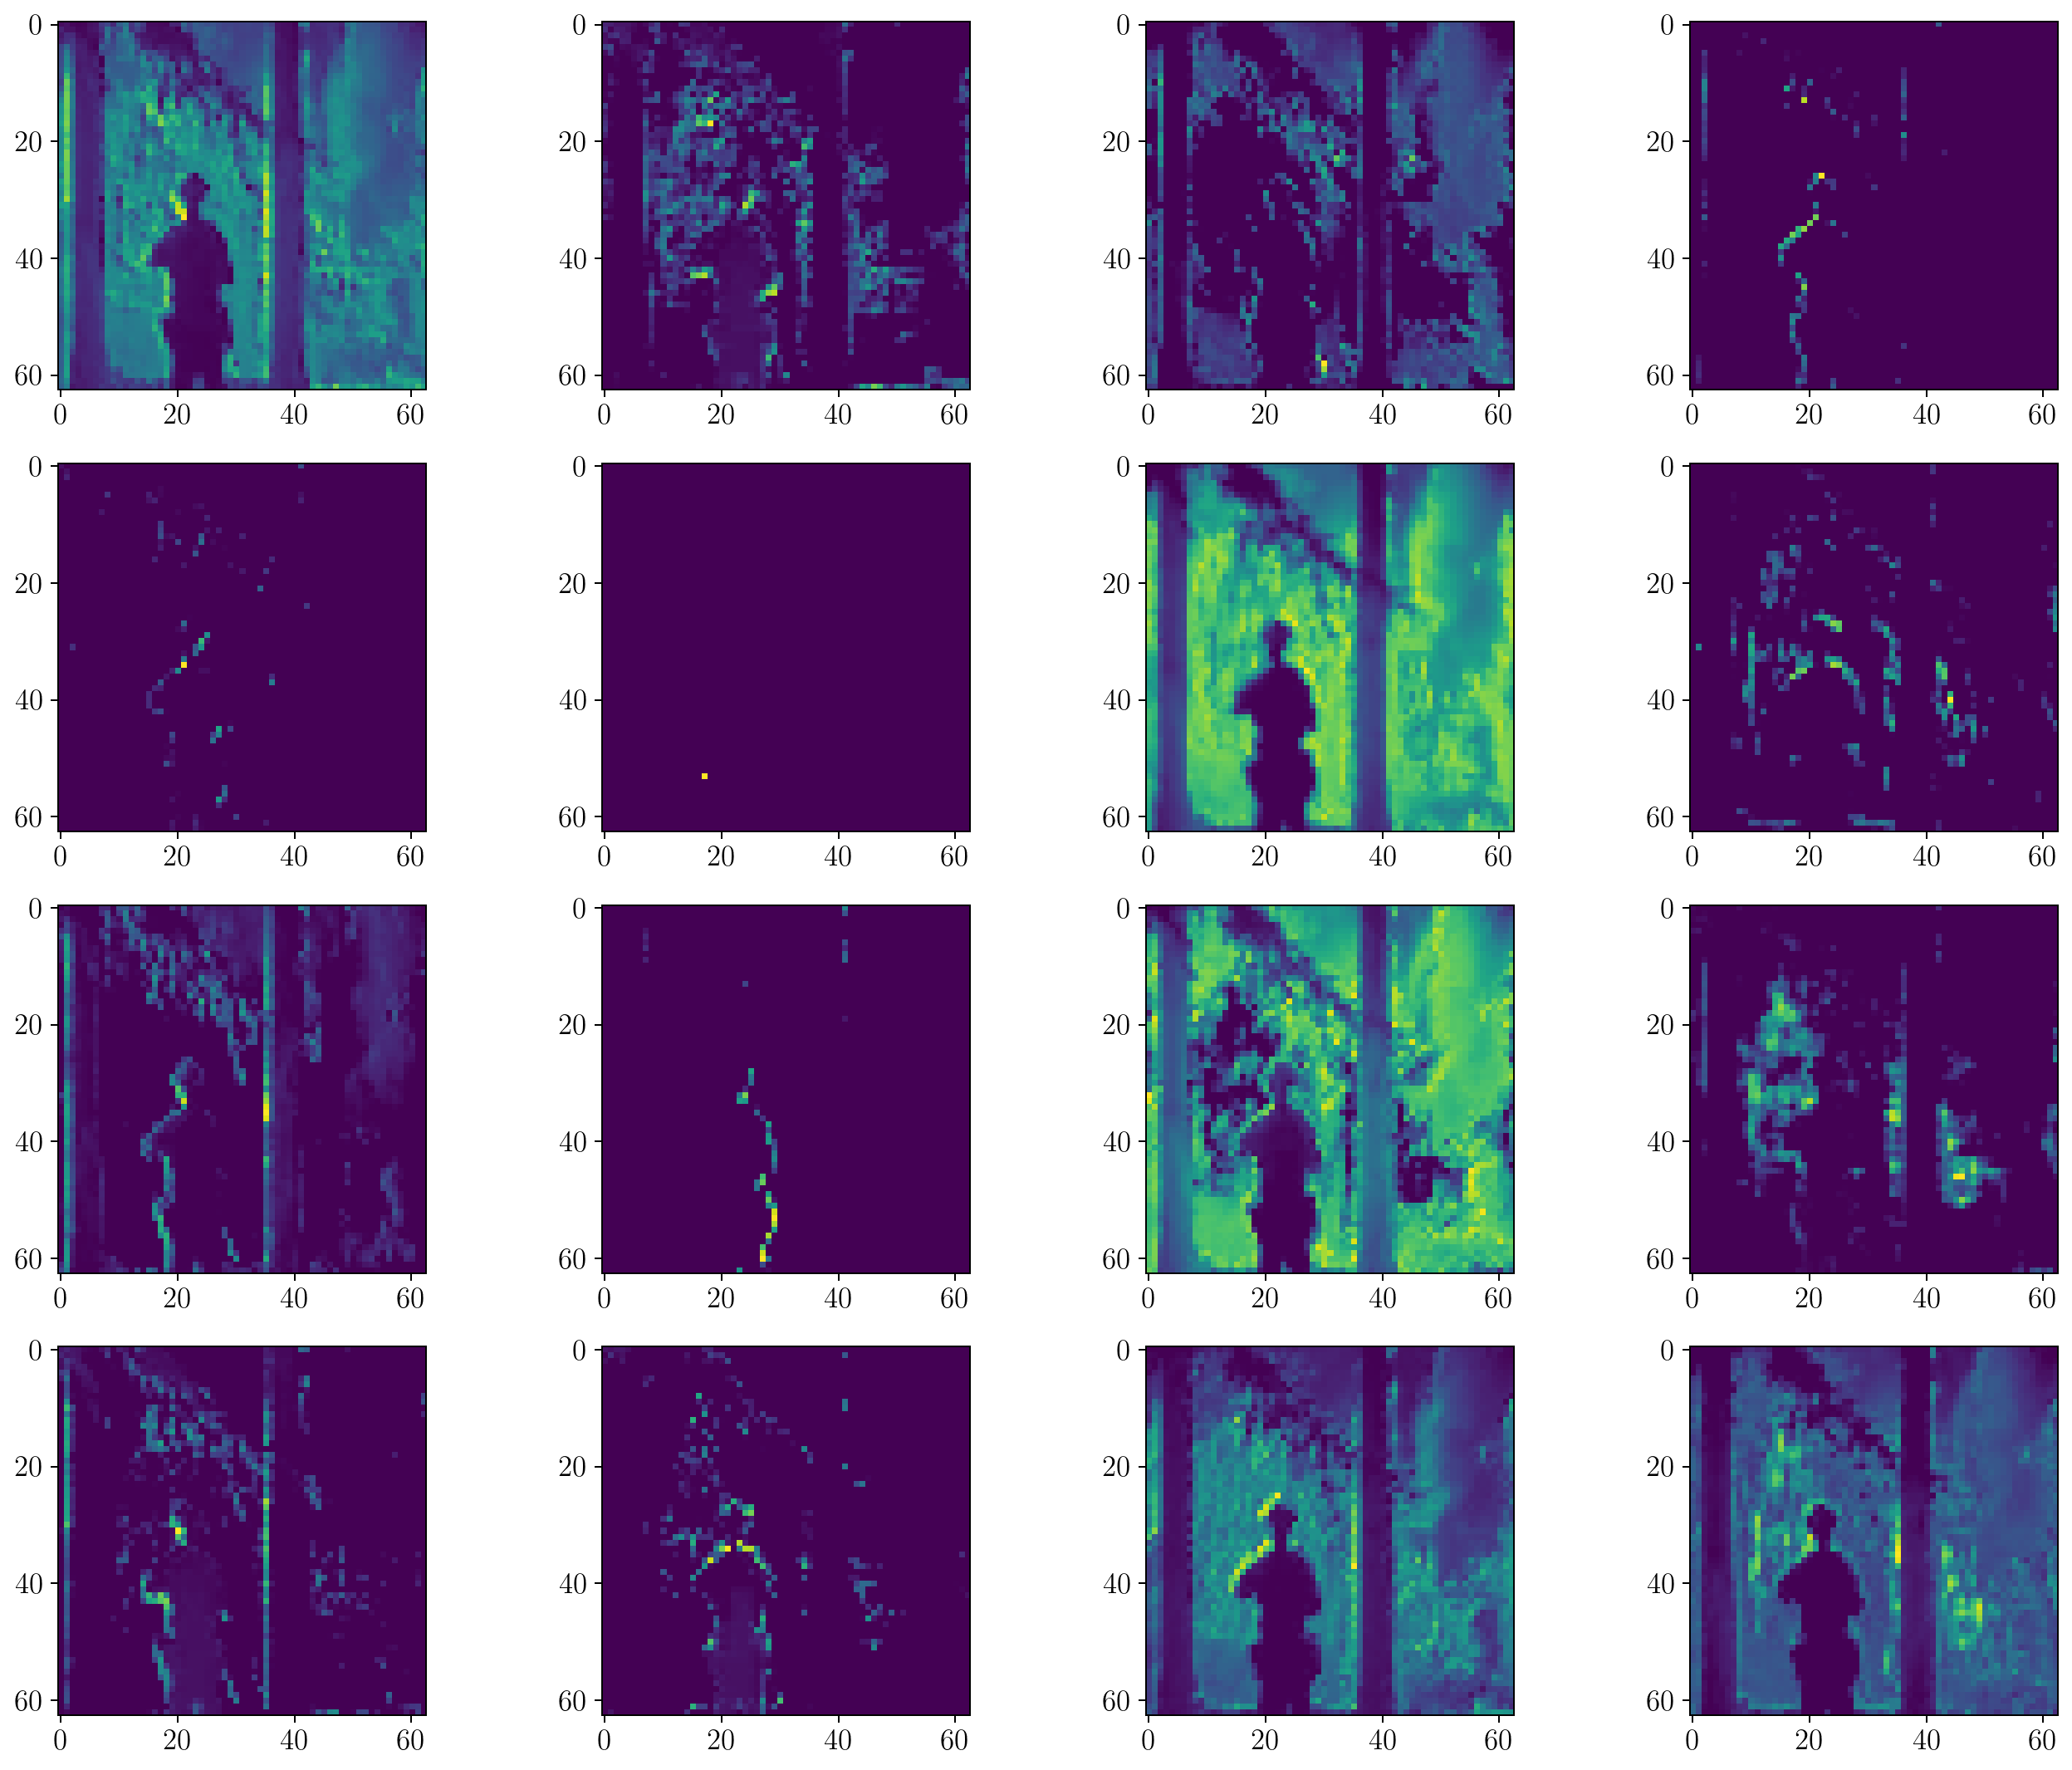

In [ ]:
import itertools
nrows = 4
ncols = 4

fig, axes = plt.subplots(4,4, figsize=(18,15))
for i, iax in enumerate(list(itertools.product(range(nrows), range(ncols)))):
  axes[iax[0], iax[1]].imshow(image_features[0, :, :, i])

# Comments and unused code

In [ ]:
# n = 4
# batch[0][:n]
# for idx, img in enumerate():